In [2]:
import cv2
from scipy.fftpack import dct, idct
import matplotlib.pyplot as plt
import numpy as np

This notebook illustrates how we created the PSD figures in our paper.
We simply consider one of the 2 image dimensions, and look at the span of frequencies across that dimension while fixing the frequency range of the other dimension to the lowest frequencies. This is because the signals become too sparse if we look at a larger range of frequencies for the fixed dimension.
Due to the large DC component (the inverse relation between natural image PSD and frequency), we visualize in log scale.

**NOTE: for our paper figures, the results are averaged over 100 images.**

We also note that the PSD of the filtered (blurred) LR image should be taken **before downsampling**, otherwise the frequency distribution gets stretched and the visualization becomes less readable.

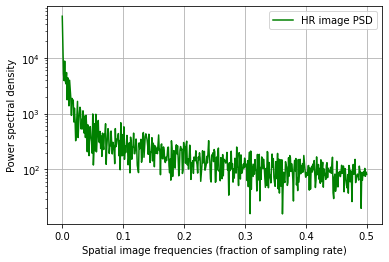

In [54]:
# Compute the PSD of a single image:
img = cv2.imread('figures/pipeline_teaser.png')
(w,h,_) = np.shape(img)
img = img[:1000,:1000,:]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_dct = dct(dct(img, axis=0, norm='ortho'), axis=1, norm='ortho')
img_dct = np.abs(img_dct)

# Plot the image PSD:
xaxs = np.linspace(0, 0.5, 500)
ax = plt.figure().add_subplot(111)
ax.plot(xaxs, np.mean(img_dct[:5,:500,1],0), color='g', label='HR image PSD')
ax.set_yscale('log')
ax.grid()
plt.ylabel('Power spectral density')
plt.xlabel('Spatial image frequencies (fraction of sampling rate)')
plt.legend()
plt.show()